# Popularity of a song in Spotify

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Imports our dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Read the CSV and Perform Basic Data Cleaning

In [3]:
# Load the data
song_df = pd.read_csv("./Resources/songfeatures.csv")
song_df

,Artist,Streams,Date,genre,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Shakira,244295,2017-01-01,Dance,Chantaje (feat. Maluma),6mICuAdrwEjh6Y6lroV2Kg,78,0.18700,0.852,195840,0.773,0.000030,G#,0.1590,-2.921,Minor,0.0776,102.034,4/4,0.9070
1,Twenty One Pilots,227187,2017-01-01,Rock,Stressed Out,3CRDbSIZ4r5MsZ0YwxuEkn,84,0.04620,0.734,202333,0.637,0.000023,E,0.0602,-5.677,Minor,0.1410,169.977,4/4,0.6480
2,Bryson Tiller,213378,2017-01-01,Hip-Hop,Don't,3pXF1nA74528Edde4of9CC,79,0.22200,0.765,198293,0.356,0.000000,B,0.0963,-5.556,Minor,0.1960,97.001,4/4,0.1900
3,Lil Uzi Vert,208263,2017-01-01,Rap,Erase Your Social,4uhvMW7ly7tJil31YYscAN,75,0.69400,0.705,199993,0.609,0.000000,D#,0.2340,-5.728,Major,0.0729,140.058,4/4,0.7180
4,Van Morrison,175044,2017-01-01,Folk,Brown Eyed Girl,3yrSvpt2l1xhsV9Em88Pul,80,0.18200,0.491,183307,0.583,0.000000,G,0.4070,-10.964,Major,0.0376,150.572,4/4,0.9070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45714,Lil Pump,1358590,2017-12-02,Hip-Hop,Gucci Gang,43ZyHQITOjhciSUUNPVRHc,78,0.23900,0.936,124056,0.523,0.000000,F,0.1170,-6.710,Major,0.0597,119.889,4/4,0.6990
45715,Famous Dex,687790,2017-12-02,Hip-Hop,PICK IT UP (feat. A$AP Rocky),3ncgNpxLoBQ65ABk4djDyd,79,0.01490,0.921,191252,0.467,0.000238,C#,0.3340,-8.443,Major,0.1190,135.995,4/4,0.2870
45716,6LACK,181424,2017-12-03,Alternative,Ex Calling,1MQ8ydvrTnn2QJgXFATJvD,67,0.00561,0.773,211960,0.564,0.000020,C#,0.2130,-7.241,Major,0.2490,155.976,4/4,0.0588
45717,Lil Pump,1175011,2017-12-04,Hip-Hop,Gucci Gang,43ZyHQITOjhciSUUNPVRHc,78,0.23900,0.936,124056,0.523,0.000000,F,0.1170,-6.710,Major,0.0597,119.889,4/4,0.6990


In [4]:
#Adding a new column where 1 is above avg stream values and 0 below avg stream values
song_df['Above Avg Streams']= song_df['Streams'].apply(lambda x: '1' if x >= song_df['Streams'].mean() else '0')
                
song_df

,Artist,Streams,Date,genre,track_name,track_id,popularity,acousticness,danceability,duration_ms,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Above Avg Streams
0,Shakira,244295,2017-01-01,Dance,Chantaje (feat. Maluma),6mICuAdrwEjh6Y6lroV2Kg,78,0.18700,0.852,195840,...,0.000030,G#,0.1590,-2.921,Minor,0.0776,102.034,4/4,0.9070,0
1,Twenty One Pilots,227187,2017-01-01,Rock,Stressed Out,3CRDbSIZ4r5MsZ0YwxuEkn,84,0.04620,0.734,202333,...,0.000023,E,0.0602,-5.677,Minor,0.1410,169.977,4/4,0.6480,0
2,Bryson Tiller,213378,2017-01-01,Hip-Hop,Don't,3pXF1nA74528Edde4of9CC,79,0.22200,0.765,198293,...,0.000000,B,0.0963,-5.556,Minor,0.1960,97.001,4/4,0.1900,0
3,Lil Uzi Vert,208263,2017-01-01,Rap,Erase Your Social,4uhvMW7ly7tJil31YYscAN,75,0.69400,0.705,199993,...,0.000000,D#,0.2340,-5.728,Major,0.0729,140.058,4/4,0.7180,0
4,Van Morrison,175044,2017-01-01,Folk,Brown Eyed Girl,3yrSvpt2l1xhsV9Em88Pul,80,0.18200,0.491,183307,...,0.000000,G,0.4070,-10.964,Major,0.0376,150.572,4/4,0.9070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45714,Lil Pump,1358590,2017-12-02,Hip-Hop,Gucci Gang,43ZyHQITOjhciSUUNPVRHc,78,0.23900,0.936,124056,...,0.000000,F,0.1170,-6.710,Major,0.0597,119.889,4/4,0.6990,1
45715,Famous Dex,687790,2017-12-02,Hip-Hop,PICK IT UP (feat. A$AP Rocky),3ncgNpxLoBQ65ABk4djDyd,79,0.01490,0.921,191252,...,0.000238,C#,0.3340,-8.443,Major,0.1190,135.995,4/4,0.2870,1
45716,6LACK,181424,2017-12-03,Alternative,Ex Calling,1MQ8ydvrTnn2QJgXFATJvD,67,0.00561,0.773,211960,...,0.000020,C#,0.2130,-7.241,Major,0.2490,155.976,4/4,0.0588,0
45717,Lil Pump,1175011,2017-12-04,Hip-Hop,Gucci Gang,43ZyHQITOjhciSUUNPVRHc,78,0.23900,0.936,124056,...,0.000000,F,0.1170,-6.710,Major,0.0597,119.889,4/4,0.6990,1


In [5]:
#  Remove all the non numeric value columns
ml_df= song_df[[ 'Above Avg Streams', 'acousticness', 'danceability', 'duration_ms', 'energy', 'key', 'mode', 'instrumentalness','liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

ml_df.head()

,Above Avg Streams,acousticness,danceability,duration_ms,energy,key,mode,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.1870,0.852,195840,0.773,G#,Minor,0.000030,0.1590,-2.921,0.0776,102.034,0.907
1,0,0.0462,0.734,202333,0.637,E,Minor,0.000023,0.0602,-5.677,0.1410,169.977,0.648
2,0,0.2220,0.765,198293,0.356,B,Minor,0.000000,0.0963,-5.556,0.1960,97.001,0.190
3,0,0.6940,0.705,199993,0.609,D#,Major,0.000000,0.2340,-5.728,0.0729,140.058,0.718
4,0,0.1820,0.491,183307,0.583,G,Major,0.000000,0.4070,-10.964,0.0376,150.572,0.907


In [6]:
#Transforming the column 'mode' from text to numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
song2_df = ml_df.copy()
song2_df['mode'] = le.fit_transform(song2_df['mode'])
song2_df

,Above Avg Streams,acousticness,danceability,duration_ms,energy,key,mode,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.18700,0.852,195840,0.773,G#,1,0.000030,0.1590,-2.921,0.0776,102.034,0.9070
1,0,0.04620,0.734,202333,0.637,E,1,0.000023,0.0602,-5.677,0.1410,169.977,0.6480
2,0,0.22200,0.765,198293,0.356,B,1,0.000000,0.0963,-5.556,0.1960,97.001,0.1900
3,0,0.69400,0.705,199993,0.609,D#,0,0.000000,0.2340,-5.728,0.0729,140.058,0.7180
4,0,0.18200,0.491,183307,0.583,G,0,0.000000,0.4070,-10.964,0.0376,150.572,0.9070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45714,1,0.23900,0.936,124056,0.523,F,0,0.000000,0.1170,-6.710,0.0597,119.889,0.6990
45715,1,0.01490,0.921,191252,0.467,C#,0,0.000238,0.3340,-8.443,0.1190,135.995,0.2870
45716,0,0.00561,0.773,211960,0.564,C#,0,0.000020,0.2130,-7.241,0.2490,155.976,0.0588
45717,1,0.23900,0.936,124056,0.523,F,0,0.000000,0.1170,-6.710,0.0597,119.889,0.6990


In [7]:
#Transforming the column 'key' from text to numerical value
le = LabelEncoder()
df = song2_df.copy()
df['key'] = le.fit_transform(df['key'])
df

,Above Avg Streams,acousticness,danceability,duration_ms,energy,key,mode,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.18700,0.852,195840,0.773,11,1,0.000030,0.1590,-2.921,0.0776,102.034,0.9070
1,0,0.04620,0.734,202333,0.637,7,1,0.000023,0.0602,-5.677,0.1410,169.977,0.6480
2,0,0.22200,0.765,198293,0.356,2,1,0.000000,0.0963,-5.556,0.1960,97.001,0.1900
3,0,0.69400,0.705,199993,0.609,6,0,0.000000,0.2340,-5.728,0.0729,140.058,0.7180
4,0,0.18200,0.491,183307,0.583,10,0,0.000000,0.4070,-10.964,0.0376,150.572,0.9070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45714,1,0.23900,0.936,124056,0.523,8,0,0.000000,0.1170,-6.710,0.0597,119.889,0.6990
45715,1,0.01490,0.921,191252,0.467,4,0,0.000238,0.3340,-8.443,0.1190,135.995,0.2870
45716,0,0.00561,0.773,211960,0.564,4,0,0.000020,0.2130,-7.241,0.2490,155.976,0.0588
45717,1,0.23900,0.936,124056,0.523,8,0,0.000000,0.1170,-6.710,0.0597,119.889,0.6990


# Split the Data into Training and Testing

In [8]:
# Create our features
X =df.drop(columns="Above Avg Streams", axis=1)


# Create our target
y = df["Above Avg Streams"]

In [9]:
X.describe()

,acousticness,danceability,duration_ms,energy,key,mode,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45719.000000,45719.000000,45719.000000,45719.000000,45719.000000,45719.000000,45719.000000,45719.000000,45719.000000,45719.000000,45719.000000,45719.000000
mean,0.194346,0.715181,219834.549268,0.589811,5.402655,0.443820,0.004290,0.156315,-6.732634,0.158591,121.161888,0.439725
std,0.197109,0.131536,43935.095517,0.154051,3.531595,0.496839,0.031217,0.098083,2.321580,0.130121,28.291506,0.209069
min,0.000019,0.148000,46960.000000,0.098200,0.000000,0.000000,0.000000,0.021500,-22.507000,0.023200,46.718000,0.037300
25%,0.049600,0.638000,194613.000000,0.489000,2.000000,0.000000,0.000000,0.097600,-7.817000,0.052300,97.985000,0.281000
50%,0.119000,0.732000,218674.000000,0.586000,4.000000,0.000000,0.000000,0.123000,-6.388000,0.103000,123.956000,0.422000
75%,0.264000,0.804000,243837.000000,0.711000,9.000000,1.000000,0.000010,0.180000,-5.151000,0.244000,139.999000,0.605000
max,0.994000,0.967000,728413.000000,0.995000,11.000000,1.000000,0.939000,0.919000,-0.804000,0.623000,232.690000,0.971000


In [10]:
# Check the balance of our target values
y.value_counts()

0    32174
1    13545
Name: Above Avg Streams, dtype: int64

In [11]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(34289, 12)

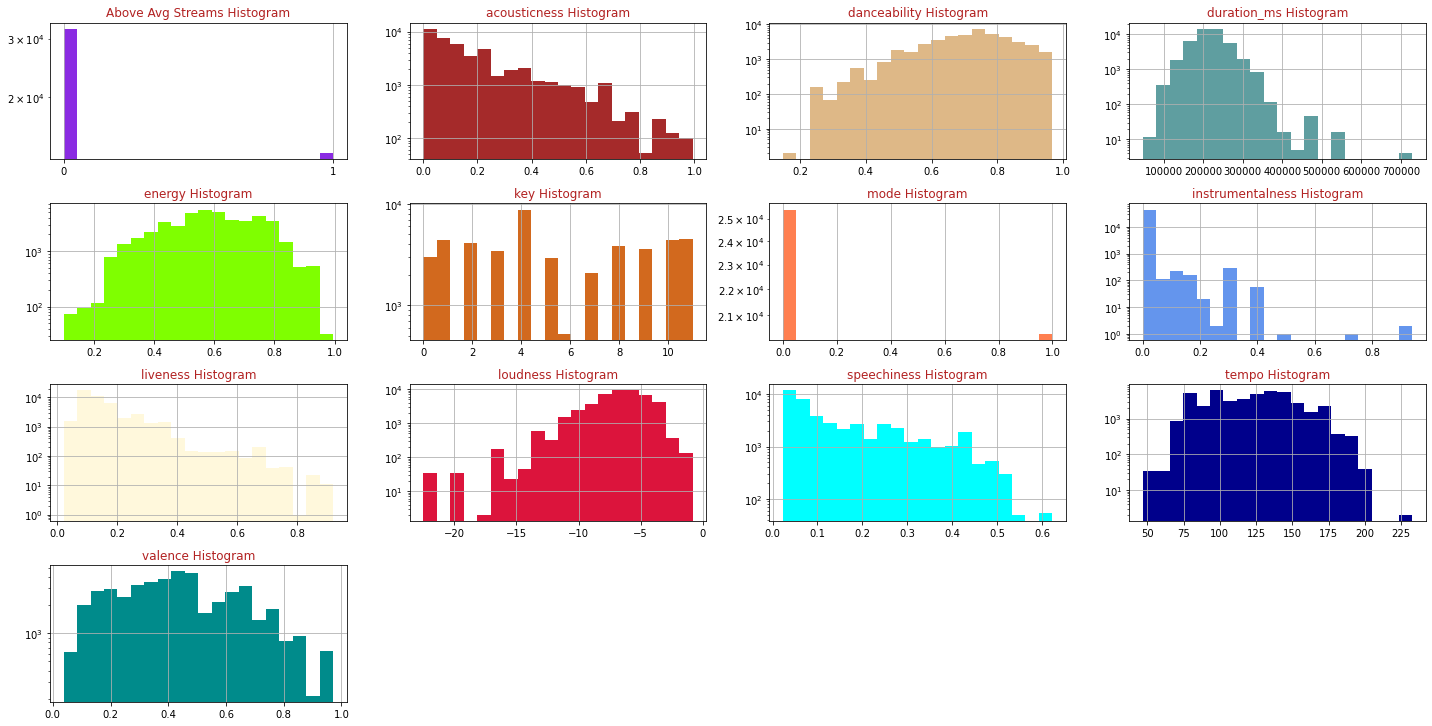

In [12]:
#Visualize the features histogram
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

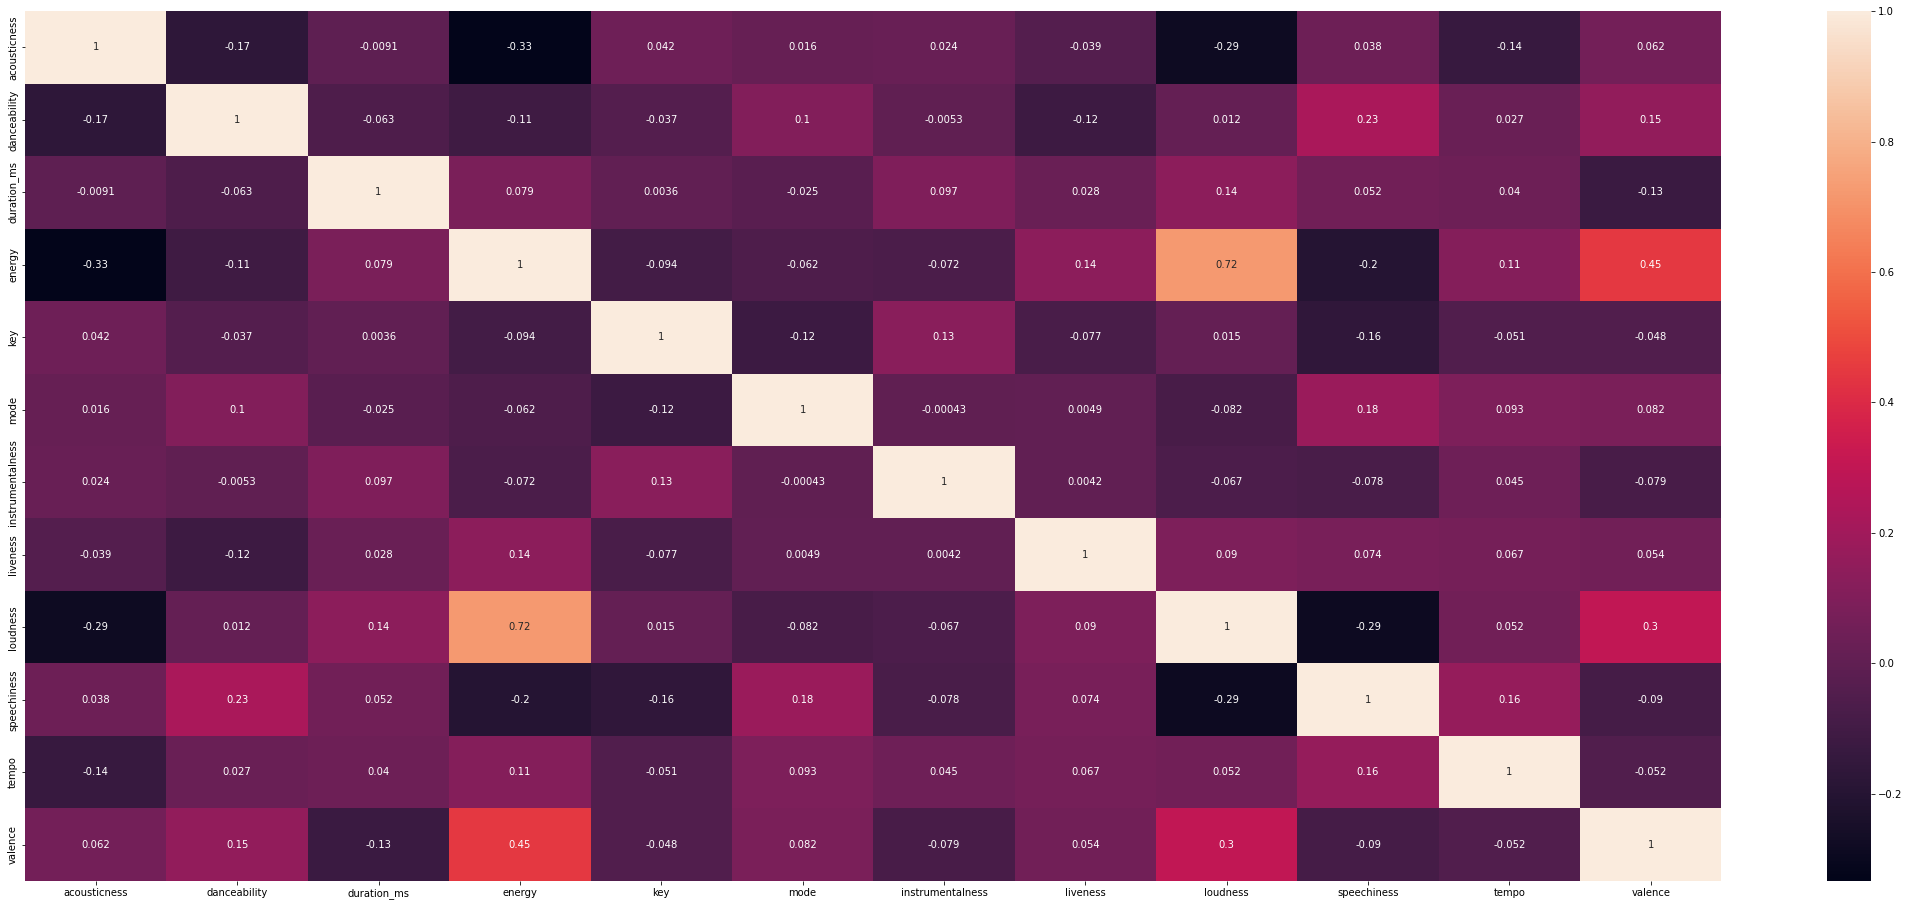

In [13]:
#Observe the dependency of variables on each other by studying their correlation
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

# Create a Random Forest model

In [14]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [15]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [16]:
# Making predictions using the testing data.
y_pred = rf_model.predict(X_test)

In [17]:
# Calculated the balanced accuracy score
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))


The Accuracy for Test Set is 82.67716535433071


In [18]:
# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      8044
           1       0.78      0.58      0.67      3386

    accuracy                           0.83     11430
   macro avg       0.81      0.76      0.77     11430
weighted avg       0.82      0.83      0.82     11430



In [19]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[7480  564]
 [1416 1970]]


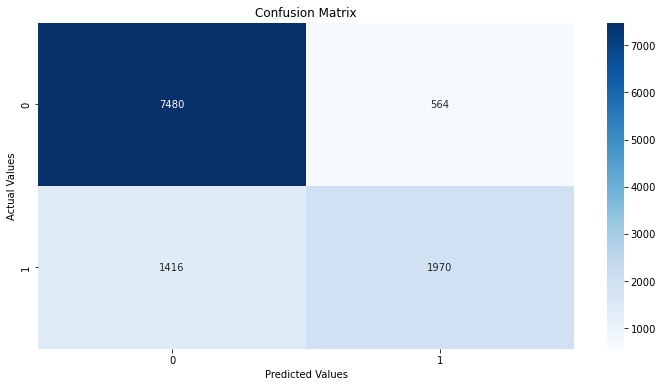

In [20]:
# Display the confusion matrix graph
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [22]:
# List the features sorted in descending order by feature importance
features = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
for feature in features:
    print(f"{feature[1]}: ({feature[0]})")

acousticness: (0.11939307248701467)
liveness: (0.11641848286829186)
danceability: (0.11450129614470103)
loudness: (0.101678944946144)
energy: (0.09862010228598253)
valence: (0.09122813388227288)
speechiness: (0.08441847506552373)
tempo: (0.0822752227913324)
duration_ms: (0.08075580371173834)
key: (0.05361507264212731)
instrumentalness: (0.043281743808157275)
mode: (0.01381364936671407)
